# 2) IACOV - Model Development for Prognosis - MV
## Strategy 5) Training on 70% of all other hospitals plus 70% of a specific hospital. Test on 30% of the specific hospital

Code below to import libraries when running this point forward

In [1]:
# !pip install npm nodejs

In [2]:
# !jupyter lab clean
# !jupyter lab build

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#comment next line to not use MLFlow for cleaning data
from MLFlow_Classification import *
from MLFlow_Utils import *

C:\Users\carin\AppData\Local\Temp\ipykernel_11912\2017038996.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### This code uses just 14 hospitals, since ICU or MV has no variation for 4 hospitals
#### - The code that prepares the data to run all strategies for ICU and MV is: PREPARING_DATA_TO_UCI_MV_ANALYSES
#### - df_iacov_en.csv (used for death) was replaced here by df_iacov_model_lean_14hosp.csv
#### - put df_iacov_model_lean_14hosp.csv in same folder as this notebook

In [4]:
#Put csv in same folder as this notebook
dataset = pd.read_csv("df_iacov_model_lean_14hosp.csv", delimiter=";")
df_iacov_model = pd.DataFrame(dataset)
df_iacov_model.shape

(6046, 30)

In [5]:
df_iacov_model.columns

Index(['city_hospital', 'age', 'male', 'race', 'heart_rate', 'resp_rate',
       'sys_press', 'dias_press', 'mean_press', 'temp', 'hemoglobin',
       'platelets', 'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv',
       'leukocytes', 'neutrophil', 'lymphocytes', 'basophils', 'eosinophils',
       'monocytes', 'crp', 'death', 'icu', 'mv', 'state', 'region', 'excluir'],
      dtype='object')

## 2.1) Assign binary outcome to be predicted

### 2.1.1) Maintain essential variables (LEAN Model)

In [6]:
#22 predictors + outcome + Region/State
df_iacov_model_lean = df_iacov_model[['city_hospital'
                                      ,'age'
                                      ,'male'
                                      ,'heart_rate'
                                      ,'resp_rate'
                                      ,'sys_press'
                                      ,'dias_press'
                                      ,'mean_press'
                                      ,'temp'
                                      ,'hemoglobin'
                                      ,'platelets'
                                      ,'hematocrit'
                                      ,'red_cells_count'
                                      ,'hcm'
                                      ,'rdw'
                                      ,'mcv'
                                      ,'leukocytes'
                                      ,'neutrophil'
                                      ,'lymphocytes'
                                      ,'basophils'
                                      ,'eosinophils'
                                      ,'monocytes'
                                      ,'crp'
                                      ,'mv'
                                      ,'region' #for filtering purposes
                                      ,'state' #for filtering purposes
                                     ]]
df_iacov_model_lean.shape

(6046, 26)

In [7]:
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [8]:
df_iacov_model_lean.to_csv('df_iacov_model_lean.csv', sep=';', index=False)

### 2.1.2) Filter a specific hospital

In [9]:
#Put csv in same folder as this notebook
df_all_hospitals = pd.read_csv("df_iacov_model_lean.csv", delimiter=";", decimal=".")
df_all_hospitals.shape

(6046, 26)

In [10]:
df_all_hospitals.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'mv', 'region', 'state'],
      dtype='object')

In [11]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

In [12]:
column_summaries(df_all_hospitals)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
city_hospital,0,0.000,14,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0,0.000,98,0,float64,-0.060,6046.000,57.521,17.869,18.000,44.000,58.000,71.000,105.000
male,0,0.000,2,2790,float64,-0.155,6046.000,0.539,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,13.381,183,0,float64,0.611,5237.000,85.689,17.209,13.000,75.000,85.000,96.000,233.000
resp_rate,1457,24.099,69,1,float64,2.897,4589.000,21.881,6.380,0.000,18.000,20.000,24.000,108.000
sys_press,1336,22.097,215,0,float64,-0.279,4710.000,124.054,22.791,10.000,110.000,122.000,138.000,242.000
dias_press,1325,21.915,150,0,float64,-0.361,4721.000,74.608,14.626,6.000,67.000,76.000,81.000,141.000
mean_press,1366,22.593,1452,326,float64,-1.751,4680.000,83.731,28.475,0.000,78.981,90.000,98.648,166.000
temp,1173,19.401,128,1,float64,62.972,4873.000,36.430,4.976,0.000,36.000,36.300,36.800,372.000
hemoglobin,1904,31.492,226,0,float64,-0.628,4142.000,12.752,2.189,1.400,11.692,13.000,14.200,30.600


In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

In [14]:
df_all_hospitals.city_hospital.value_counts()

city_hospital
HC_USP                        1500
HOSPPORTUGUES_SALVADOR        1359
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [15]:
# Hospitals excluded for ICU and MV analyses: 'HOSPSANTACASASP_FULL', 'HOSPGRUPOSANTA', 'HUTRIN_2021_02', 'RIO_DE_JANEIRO_HUCFF'
dropdown_hospital = widgets.Dropdown(options = ['Choose a hospital ...'
                                                ,'HC_USP'                     #SP
                                                ,'HOSPPORTUGUES_SALVADOR'     #BA
                                                ,'CEARA_UNIMED'               #CE
                                                ,'HRL_2021_02'                #GO - Luiziania
                                                ,'HMV_POA_02'                 #RS - Moinhos de Vento
                                                ,'RIO_DE_JANEIRO_UNIMED'      #RJ
                                                ,'HOSPSANTAJULIA_MANAUS'      #AM
                                                ,'HOSPSANTACATARINABLUMENAU'  #SC
                                                ,'HOSPSAOFRANCISCO_MOGIGUACU' #SP
                                                ,'PERNAMBUCO_FULL'            #PE
                                                ,'PELOTAS'                    #RS
                                                ,'CEARA_HUWC'                 #CE
                                                ,'HEVV'                       #ES - Vila Velha
                                                ,'AMAZONAS_HUGV'              #AM
#                                                 ,'GHC_02'                     #RS 
                                               ])

In [16]:
specific_hospital = 'Choose a hospital'
df_iacov_model_lean = df_all_hospitals

def dropdown_hospital_eventhandler(change):
    global specific_hospital 
    specific_hospital = change.new
    dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

In [17]:
dropdown_hospital.observe(dropdown_hospital_eventhandler, names='value')

**Select Hospital to train**

In [18]:
# !pip install ipywidgets

In [19]:
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [23]:
display(dropdown_hospital)

Dropdown(index=1, options=('Choose a hospital ...', 'HC_USP', 'HOSPPORTUGUES_SALVADOR', 'CEARA_UNIMED', 'HRL_2…

**Filter all hospitals except the selected above**

In [24]:
df_all_hospitals.region.value_counts()

region
NORDESTE       2389
SUDESTE        2129
SUL             695
CENTROOESTE     539
NORTE           294
Name: count, dtype: int64

**Split train/test of specific Hospital**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Filter the specific hospital
df_iacov_model_lean_specific = df_all_hospitals[df_all_hospitals.city_hospital == specific_hospital]
df_iacov_model_lean_specific.shape

(1500, 26)

In [27]:
X_specific = df_iacov_model_lean_specific.drop(['mv'],axis=1)
X_specific.shape

(1500, 25)

In [28]:
y_specific = df_iacov_model_lean_specific['mv']
y_specific.shape

(1500,)

In [29]:
X_train_specific, X_test_specific, y_train_specific, y_test_specific = train_test_split(X_specific, y_specific, test_size=0.30, random_state=42, stratify=y_specific)

In [30]:
X_train_specific.shape

(1050, 25)

In [31]:
X_test_specific.shape

(450, 25)

**Filter all hospitals + 70% of specific hospital for TRAINING**

PS: Also removed GHC hospital due to very low positive cases

In [32]:
df_iacov_model_lean = df_all_hospitals[ (~df_all_hospitals.index.isin(X_test_specific.index)) & (df_all_hospitals.city_hospital != 'GHC_02')]
df_iacov_model_lean.shape

(5596, 26)

In [33]:
#check data with 70% of specific
df_iacov_model_lean.city_hospital.value_counts()

city_hospital
HOSPPORTUGUES_SALVADOR        1359
HC_USP                        1050
CEARA_UNIMED                   845
HRL_2021_02                    539
HMV_POA_02                     456
RIO_DE_JANEIRO_UNIMED          449
HOSPSANTAJULIA_MANAUS          247
HOSPSANTACATARINABLUMENAU      148
HOSPSAOFRANCISCO_MOGIGUACU     124
PERNAMBUCO_FULL                112
PELOTAS                         91
CEARA_HUWC                      73
HEVV                            56
AMAZONAS_HUGV                   47
Name: count, dtype: int64

In [34]:
print("Specific: " + specific_hospital )
print("(training - all hospitals + 70pct_specific) dataset: " + str(df_iacov_model_lean.shape))

print("\n(training - specific) dataset: {}".format(X_train_specific.shape))

print("\n(test - specific) dataset: {}".format(X_test_specific.shape))

Specific: HC_USP
(training - all hospitals + 70pct_specific) dataset: (5596, 26)

(training - specific) dataset: (1050, 25)

(test - specific) dataset: (450, 25)


### 2.1.3) Dropping unused variables (All hospitals)

In [35]:
df_iacov_model_lean = df_iacov_model_lean.drop(['city_hospital'],axis=1)
df_iacov_model_lean.shape

(5596, 25)

In [36]:
#Preencho NAs com 0 
df_iacov_model_lean['mv'] = df_iacov_model_lean['mv'].fillna(0)
df_iacov_model_lean.mv.value_counts()

mv
0    4092
1    1504
Name: count, dtype: int64

In [37]:
(df_iacov_model_lean.mv.value_counts()/len(df_iacov_model_lean.mv))*100

mv
0   73.124
1   26.876
Name: count, dtype: float64

### From now on the outcome will call CLASS

In [38]:
df_iacov_model_lean['class'] = df_iacov_model_lean['mv'].astype('int')
df_iacov_model_lean = df_iacov_model_lean.drop(['mv'],axis=1)

### 2.1.4) Recalculating null mean_press

In [39]:
def isNullMeanPressure(row):

    if pd.isnull(row['mean_press']):
    
        if pd.notnull(row['sys_press']) and pd.notnull(row['dias_press']):
            return (row['sys_press']+row['dias_press'])/2
        else:
            return row['mean_press']
    else:
        return row['mean_press']

In [40]:
#Check mean_press missing before recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,98,0,float64,-0.043,5596.000,57.432,18.027,18.000,43.000,58.000,71.000,105.000
male,0,0.000,2,2592,float64,-0.148,5596.000,0.537,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,14.457,179,0,float64,0.686,4787.000,85.619,17.076,20.000,75.000,84.000,96.000,233.000
resp_rate,1446,25.840,66,1,float64,2.497,4150.000,21.644,6.119,0.000,18.000,20.000,24.000,97.000
sys_press,1334,23.838,212,0,float64,-0.280,4262.000,124.609,22.779,10.000,110.125,123.000,139.000,242.000
dias_press,1323,23.642,147,0,float64,-0.353,4273.000,75.045,14.542,6.000,68.000,77.000,82.000,141.000
mean_press,1364,24.375,1236,326,float64,-1.712,4232.000,83.434,29.495,0.000,78.988,90.000,99.000,166.000
temp,1173,20.961,127,1,float64,60.252,4423.000,36.434,5.215,0.000,36.000,36.300,36.800,372.000
hemoglobin,1511,27.001,226,0,float64,-0.634,4085.000,12.760,2.179,1.400,11.700,13.000,14.200,30.600
platelets,707,12.634,1025,0,float64,0.367,4889.000,235817.544,146142.193,7.000,148000.000,218000.000,325000.000,992000.000


In [41]:
df_iacov_model_lean['mean_press'] = df_iacov_model_lean.apply(isNullMeanPressure, axis=1)

In [42]:
#Check mean_press missing after recalculating
column_summaries(df_iacov_model_lean)

,Missing Values,% missing of Total Values,# Unique Values,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max
age,0,0.000,98,0,float64,-0.043,5596.000,57.432,18.027,18.000,43.000,58.000,71.000,105.000
male,0,0.000,2,2592,float64,-0.148,5596.000,0.537,0.499,0.000,0.000,1.000,1.000,1.000
heart_rate,809,14.457,179,0,float64,0.686,4787.000,85.619,17.076,20.000,75.000,84.000,96.000,233.000
resp_rate,1446,25.840,66,1,float64,2.497,4150.000,21.644,6.119,0.000,18.000,20.000,24.000,97.000
sys_press,1334,23.838,212,0,float64,-0.280,4262.000,124.609,22.779,10.000,110.125,123.000,139.000,242.000
dias_press,1323,23.642,147,0,float64,-0.353,4273.000,75.045,14.542,6.000,68.000,77.000,82.000,141.000
mean_press,994,17.763,1253,326,float64,-1.727,4602.000,84.982,29.107,0.000,80.000,91.322,100.000,166.000
temp,1173,20.961,127,1,float64,60.252,4423.000,36.434,5.215,0.000,36.000,36.300,36.800,372.000
hemoglobin,1511,27.001,226,0,float64,-0.634,4085.000,12.760,2.179,1.400,11.700,13.000,14.200,30.600
platelets,707,12.634,1025,0,float64,0.367,4889.000,235817.544,146142.193,7.000,148000.000,218000.000,325000.000,992000.000


In [43]:
X_test_specific['mean_press'] = X_test_specific.apply(isNullMeanPressure, axis=1)

In [44]:
#column_summaries(X_test_specific)

### Put X_test and y_test in separate files

In [45]:
x_test_specific_name = 'X_test_all_plus_70pct_specific_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
x_test_specific_name

'X_test_all_plus_70pct_specific_SUDESTE_SP_HC_USP.csv'

In [46]:
y_test_specific_name = 'y_mv_all_plus_70pct_specific_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
y_test_specific_name

'y_mv_all_plus_70pct_specific_SUDESTE_SP_HC_USP.csv'

In [47]:
X_test_specific.to_csv(x_test_specific_name, sep=';')
X_test_specific.shape

(450, 25)

In [48]:
y_test_specific.to_csv(y_test_specific_name, sep=';')
y_test_specific.shape

(450,)

## 2.4) Prepare Experiment 

### All hospitals plus 70% of specific

In [49]:
df_iacov_model_lean.shape

(5596, 25)

In [50]:
df_iacov_model_train = df_iacov_model_lean

In [51]:
df_iacov_model_train = df_iacov_model_train.drop(['region'],axis=1)
df_iacov_model_train = df_iacov_model_train.drop(['state'],axis=1)
df_iacov_model_train.columns

Index(['age', 'male', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp', 'class'],
      dtype='object')

In [52]:
df_iacov_model_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5596 entries, 0 to 6045
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              5596 non-null   float64
 1   male             5596 non-null   float64
 2   heart_rate       4787 non-null   float64
 3   resp_rate        4150 non-null   float64
 4   sys_press        4262 non-null   float64
 5   dias_press       4273 non-null   float64
 6   mean_press       4602 non-null   float64
 7   temp             4423 non-null   float64
 8   hemoglobin       4085 non-null   float64
 9   platelets        4889 non-null   float64
 10  hematocrit       3638 non-null   float64
 11  red_cells_count  3362 non-null   float64
 12  hcm              4440 non-null   float64
 13  rdw              4440 non-null   float64
 14  mcv              4446 non-null   float64
 15  leukocytes       4890 non-null   float64
 16  neutrophil       3557 non-null   float64
 17  lymphocytes      42

In [53]:
exp = setup(df_iacov_model_train
            , target='class'
            , categorical_features = ['male']
            , numeric_features = ['crp','basophils','eosinophils','red_cells_count','monocytes','hemoglobin','resp_rate','neutrophil','hematocrit']
            , normalize=True
            #, remove_multicollinearity=True
            ,numeric_imputation='median'
#             ,numeric_imputation='ignore'
            #,multicollinearity_threshold=0.9
            , resample=True
            , resample_method='random_over'
#             , train_size = 1.0 #100pct for training
           )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(5596, 23)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [54]:
X, y, X_train, X_test, y_train, y_test, seed, prep_pipe, _ = exp

In [55]:
X_train.shape

(5728, 22)

In [56]:
X_test.shape

(1679, 22)

In [57]:
seed

42

In [58]:
# Xtrain.head()

### Filtering only 5 pre-selected models

In [59]:
# print(inspect.getsource(compare_models))

In [60]:
#Modelos que suportam missing (1) - Modelos pre-selecionados(2)
compare_models(blacklist = ["lr","knn","nb","dt","svm","rbfsvm","gpc","ridge","qda","ada","gbc","lda","et","mlp","rf"] , turbo = False)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.894700,0.959700,0.953200,0.836200,0.853500,0.900500,0.789400,0.007000,0.364800,0.684000
1,Light Gradient Boosting Machine,0.875500,0.943600,0.933700,0.817400,0.836700,0.882400,0.751000,0.046700,0.020800,0.626300
2,CatBoost Classifier,0.865100,0.934000,0.916200,0.813900,0.831600,0.871600,0.730100,0.088600,0.011300,0.590200


### Tune selected models by AUC (and hyperopt bayesian optimization) to use on test data

In [61]:
cattuned = tune_model('catboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.909,0.978,0.951,0.867,0.878,0.913,0.819,0.000,0.000,0.741
1,0.907,0.976,0.951,0.864,0.875,0.911,0.815,0.000,0.000,0.727
2,0.897,0.985,0.962,0.832,0.852,0.903,0.794,0.000,0.000,0.738
3,0.895,0.982,0.962,0.829,0.849,0.902,0.790,0.000,0.000,0.694
4,0.916,0.979,0.948,0.885,0.891,0.919,0.833,0.000,0.003,0.746
5,0.914,0.980,0.969,0.861,0.874,0.919,0.829,0.000,0.000,0.731
6,0.935,0.989,0.976,0.895,0.903,0.938,0.871,0.000,0.546,0.804
7,0.916,0.986,0.958,0.875,0.884,0.919,0.833,0.000,0.001,0.772
8,0.918,0.983,0.976,0.860,0.875,0.922,0.836,0.000,0.001,0.754
9,0.907,0.978,0.951,0.864,0.875,0.911,0.815,0.000,0.000,0.737


In [62]:
lgbmtuned = tune_model('lightgbm', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.899,0.974,0.948,0.850,0.864,0.904,0.797,0.000,0.000,0.668
1,0.911,0.985,0.969,0.853,0.869,0.916,0.822,0.000,0.000,0.709
2,0.911,0.979,0.969,0.853,0.869,0.916,0.822,0.000,0.000,0.688
3,0.885,0.979,0.972,0.797,0.828,0.894,0.770,0.000,0.000,0.653
4,0.914,0.985,0.965,0.864,0.876,0.918,0.829,0.000,0.000,0.725
5,0.893,0.979,0.969,0.819,0.842,0.901,0.787,0.000,0.000,0.641
6,0.909,0.985,0.962,0.857,0.870,0.914,0.819,0.000,0.000,0.720
7,0.916,0.987,0.965,0.868,0.879,0.920,0.833,0.000,0.000,0.734
8,0.913,0.980,0.979,0.846,0.864,0.918,0.825,0.000,0.000,0.692
9,0.913,0.975,0.951,0.874,0.883,0.916,0.825,0.000,0.000,0.682


In [63]:
xgbtuned = tune_model('xgboost', optimize='AUC', n_iter=20)

,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,0.893,0.953,0.944,0.843,0.858,0.899,0.787,0.000,0.615,0.674
1,0.899,0.960,0.951,0.846,0.861,0.904,0.797,0.002,0.194,0.686
2,0.885,0.941,0.951,0.818,0.840,0.892,0.770,0.000,0.849,0.659
3,0.885,0.951,0.962,0.808,0.834,0.893,0.770,0.001,0.997,0.650
4,0.913,0.969,0.972,0.854,0.869,0.917,0.826,0.000,0.034,0.720
5,0.890,0.949,0.955,0.826,0.845,0.897,0.780,0.001,0.880,0.658
6,0.900,0.964,0.958,0.843,0.859,0.906,0.801,0.040,0.208,0.696
7,0.907,0.965,0.951,0.864,0.875,0.911,0.815,0.186,0.172,0.715
8,0.906,0.950,0.976,0.836,0.856,0.912,0.811,0.000,0.900,0.680
9,0.883,0.944,0.920,0.846,0.857,0.887,0.766,0.000,0.456,0.639


### Select best algorithm based on AUC in predicts

In [64]:
preds_cat = predict_model(cattuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,CatBoost Classifier,0.785,0.837,0.545,0.873,0.612,0.577,0.433,0.000,0.000,0.206


In [65]:
preds_lgb = predict_model(lgbmtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Light Gradient Boosting Machine,0.809,0.859,0.643,0.871,0.646,0.644,0.514,0.000,0.000,0.209


In [66]:
preds_xgb = predict_model(xgbtuned)

,Model,Accuracy,AUC,Recall,Specificity,Prec.,F1,Kappa,Hosmer_lemeshow,Spiegelhalter,Scaled_brier
0,Extreme Gradient Boosting,0.787,0.847,0.610,0.853,0.603,0.606,0.461,0.000,0.000,0.258


In [67]:
# Put in PREDS the best algorithm chosen in the previous lines: preds_cat OR preds_lgb OR preds_xgb
#preds = preds_cat
preds = preds_lgb
#preds = preds_xgb

### Best model

In [68]:
npv(y_test, preds['Label'])

0.8691056910569106

In [69]:
#ROC AUC (INTERVALO)
["{0:0.2f}".format(i) for i in AUC_CI(y_test, preds['Score'].values)]

['0.84', '0.88']

,,
,,
Ground Truth Prevalence,. . .,0.269
Test set Prevalence,. . .,0.267
True positive rate (recall),. . .,0.643
False positive rate,. . .,0.129
Positive predictive value (precision),. . .,0.646
True negative rate (specificity),. . .,0.871
False negative rate,. . .,0.357
Negative predictive value,. . .,0.869
Positive likelihood ratio (bigger is better),. . .,4.966


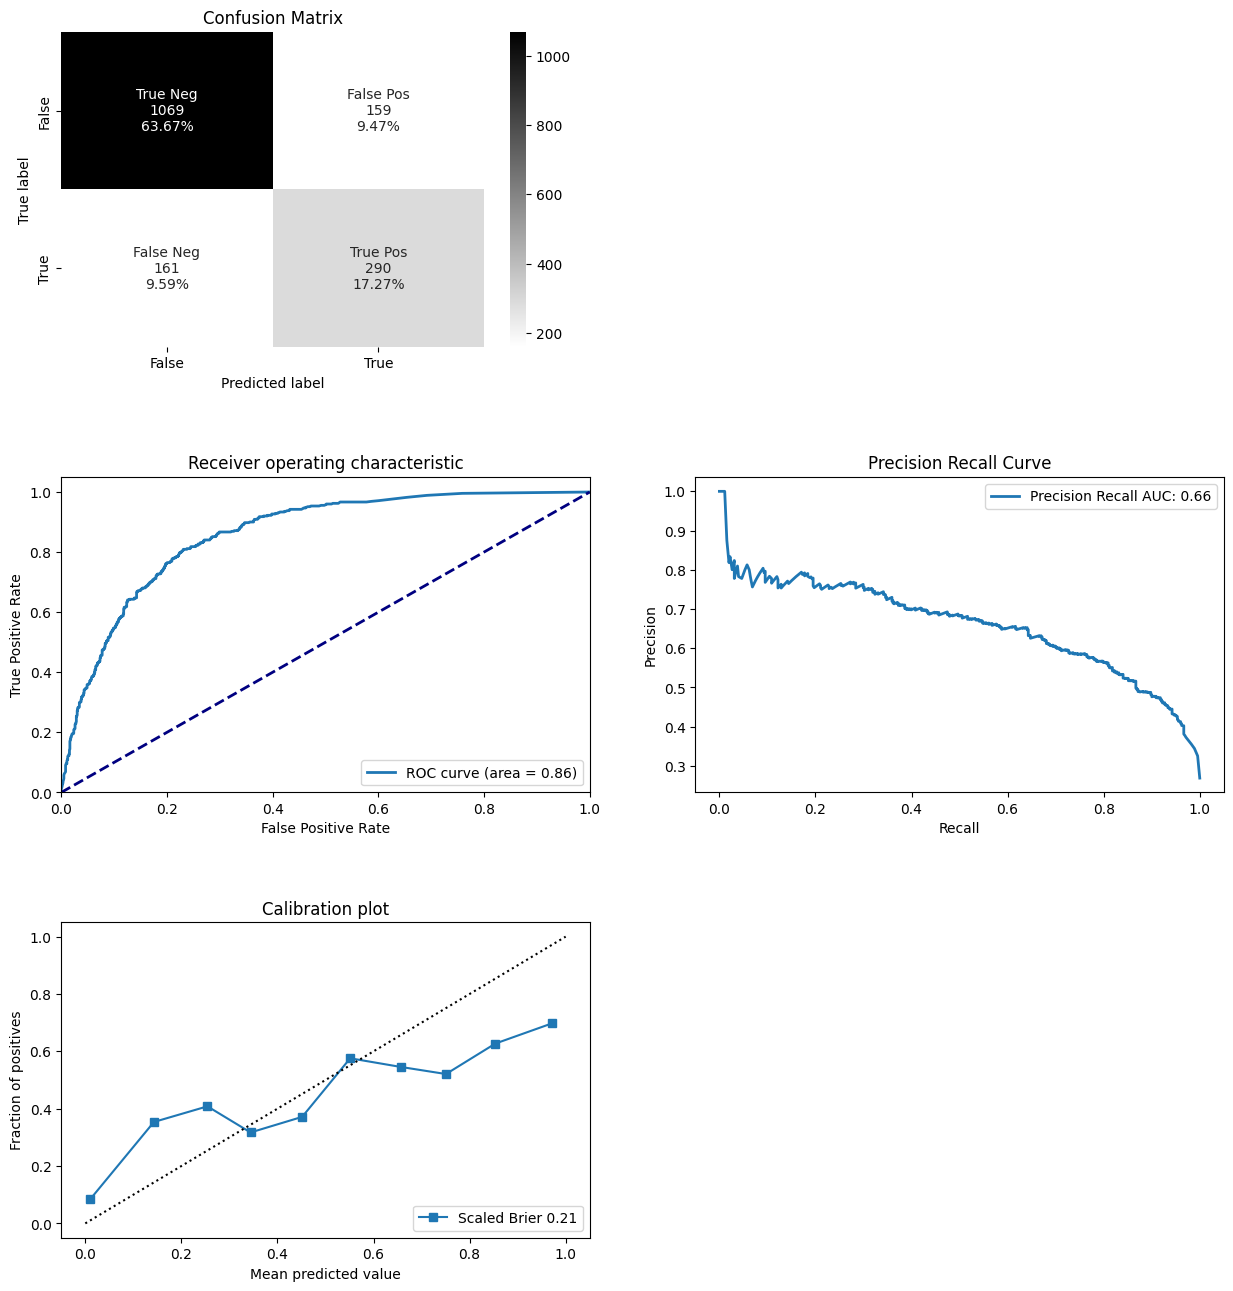

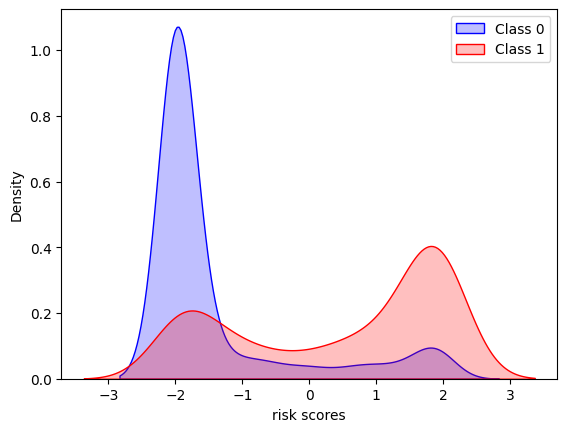

,,
,,
Ground Truth Prevalence,. . .,0.269
Test set Prevalence,. . .,0.267
True positive rate (recall),. . .,0.643
False positive rate,. . .,0.129
Positive predictive value (precision),. . .,0.646
True negative rate (specificity),. . .,0.871
False negative rate,. . .,0.357
Negative predictive value,. . .,0.869
Positive likelihood ratio (bigger is better),. . .,4.966


In [70]:
import MLFlow_Utils
binary_classification_metrics(y_test, preds["Label"], preds["Score"])

### Understand best algorithm features and results
#### Run INTERPRETE_MODEL only for the best algorithm chosen in the previous lines

In [71]:
#evaluate_model(cattuned)

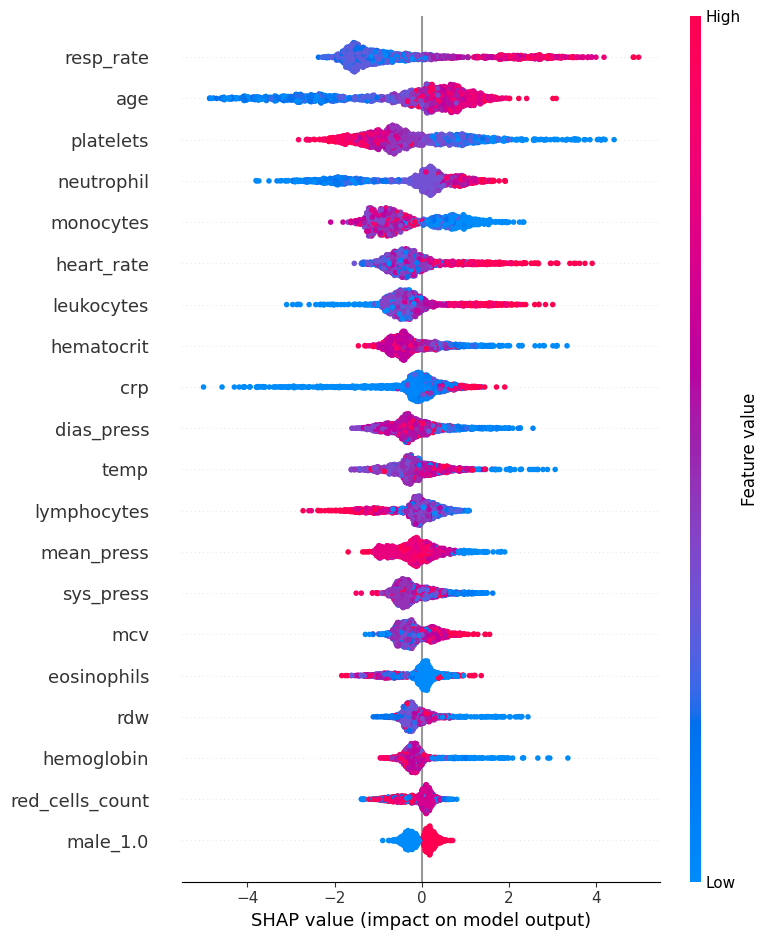

In [72]:
#interpret_model(cattuned)
interpret_model(lgbmtuned)
#interpret_model(xgbtuned)

In [73]:
#plot_model(cattuned, plot='ktops')

### 2.3.1) Build a model with all data
#### Run FINALIZE MODEL only for the best algorithm chosen in the previous lines

In [74]:
#final_model = finalize_model(cattuned)
final_model = finalize_model(lgbmtuned)
#final_model = finalize_model(xgbtuned)

[LightGBM] [Info] Number of positive: 1504, number of negative: 4092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4039
[LightGBM] [Info] Number of data points in the train set: 5596, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [75]:
str(final_model.__class__.__name__)

'LGBMClassifier'

In [76]:
final_model_name = str(final_model.__class__.__name__) + '_all_regions_plus_70pct_one_' \
                    + X_test_specific.region.iloc[0]  \
                    + '_' + X_test_specific.state.iloc[0]  \
                    + '_' + X_test_specific.city_hospital.iloc[0]
final_model_name

'LGBMClassifier_all_regions_plus_70pct_one_SUDESTE_SP_HC_USP'

In [77]:
save_model(final_model, final_model_name ,verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [78]:
final_model
#final_model.get_all_params()

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8432996648684546,
               n_estimators=1067, n_jobs=-1, num_leaves=148, random_state=42,
               reg_alpha=0.059936189081400526, reg_lambda=0.8609304819134347,
               scale_pos_weight=3)

# Use the saved model to predict on specific hospital
## ALL_REGIONS_PLUS_70PCT_ONE

In [79]:
import pickle
import joblib

#Carrego o modelo unico
print('loaded: ' + final_model_name)

all_regions_plus_70pct_one_model_pkl = final_model_name + ".pkl"
prep_pipe_all_regions_plus_70pct_one, all_regions_plus_70pct_one_model = joblib.load(all_regions_plus_70pct_one_model_pkl)

# AS DUAS LINHAS ABAIXO ESTAVAM COM O NOME DA ESTRATÉGIA 2 
#all_except_one_model_pkl = final_model_name + ".pkl"
#prep_pipe_all_except_one, all_except_one_model = joblib.load(all_except_one_model_pkl)

loaded: LGBMClassifier_all_regions_plus_70pct_one_SUDESTE_SP_HC_USP


In [80]:
all_regions_plus_70pct_one_model.__class__.__name__

'LGBMClassifier'

In [81]:
x_test_specific_name

'X_test_all_plus_70pct_specific_SUDESTE_SP_HC_USP.csv'

In [82]:
#Carrego o X_test do modelo único
X_test_single = pd.read_csv(x_test_specific_name, delimiter=";",index_col=0)
X_test_single.shape

(450, 25)

In [83]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state'],
      dtype='object')

In [84]:
#Carrego o Y_test do modelo único
y_test_single = pd.read_csv(y_test_specific_name, delimiter=";",index_col=0)
y_test_single = y_test_single["mv"]
y_test_single.shape

(450,)

In [85]:
pd.set_option('display.max_columns', None)
X_test_single.head()

,city_hospital,age,male,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,red_cells_count,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,eosinophils,monocytes,crp,region,state
2194,HC_USP,79.000,0.000,90.000,22.000,130.000,90.000,103.320,36.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
2176,HC_USP,34.000,1.000,88.000,24.000,120.000,80.000,93.320,36.200,NaN,507000.000,NaN,NaN,25.300,15.500,78.900,4800.000,2490.000,900.000,0.020,NaN,0.420,1.181,SUDESTE,SP
1685,HC_USP,78.000,1.000,92.000,18.000,130.000,80.000,96.650,37.800,NaN,434000.000,NaN,NaN,27.500,16.000,84.600,7800.000,5830.000,1280.000,0.010,NaN,0.610,NaN,SUDESTE,SP
1257,HC_USP,82.000,0.000,61.000,13.000,80.000,40.000,53.320,35.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUDESTE,SP
1787,HC_USP,61.000,1.000,63.000,23.000,117.000,72.000,86.985,36.100,NaN,NaN,NaN,NaN,29.900,13.900,88.600,3370.000,2120.000,940.000,0.000,NaN,0.310,NaN,SUDESTE,SP


In [86]:
X_test_single["class"] = y_test_single

In [87]:
X_test_single.columns

Index(['city_hospital', 'age', 'male', 'heart_rate', 'resp_rate', 'sys_press',
       'dias_press', 'mean_press', 'temp', 'hemoglobin', 'platelets',
       'hematocrit', 'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes',
       'neutrophil', 'lymphocytes', 'basophils', 'eosinophils', 'monocytes',
       'crp', 'region', 'state', 'class'],
      dtype='object')

In [88]:
X_test_single = X_test_single.drop(['city_hospital'],axis=1)
X_test_single = X_test_single.drop(['region'],axis=1)
X_test_single = X_test_single.drop(['state'],axis=1)

In [89]:
# aqui também troquei por all_regions_plus_70pct_one_model
X_test_single_transformed = prep_pipe_all_regions_plus_70pct_one.fit_transform(X_test_single)
X_test_single_transformed.head()

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
age,Numeric
male,Categorical
heart_rate,Numeric
resp_rate,Numeric
sys_press,Numeric
dias_press,Numeric
mean_press,Numeric
temp,Numeric
hemoglobin,Numeric
platelets,Numeric


,class,age,heart_rate,resp_rate,sys_press,dias_press,mean_press,temp,hemoglobin,platelets,hematocrit,hcm,rdw,mcv,leukocytes,neutrophil,lymphocytes,basophils,monocytes,crp,male_1.0
2194,0,1.295,0.192,-0.257,0.506,1.328,1.078,0.242,-0.014,-0.199,0.016,0.073,-0.241,0.004,-0.146,-0.149,-0.243,-0.397,-0.221,-0.241,0.000
2176,0,-1.566,0.085,-0.008,0.055,0.649,0.436,-0.215,-0.014,2.556,0.016,-1.616,0.596,-1.168,-0.947,-1.179,-0.083,0.029,-0.189,-0.203,1.000
1685,0,1.232,0.300,-0.755,0.506,0.649,0.649,1.612,-0.014,1.876,0.016,-0.612,0.829,-0.186,-0.333,-0.451,0.590,-0.397,0.437,-0.241,1.000
1257,0,1.486,-1.371,-1.378,-1.749,-2.066,-2.132,-1.586,-0.014,-0.199,0.016,0.073,-0.241,0.004,-0.146,-0.149,-0.243,-0.397,-0.221,-0.241,0.000
1787,1,0.151,-1.263,-0.133,-0.080,0.106,0.029,-0.329,-0.014,-0.199,0.016,0.484,-0.148,0.503,-1.240,-1.259,-0.013,-0.824,-0.551,-0.241,1.000


In [90]:
X_test_single_transformed = X_test_single_transformed.drop(['class'],axis=1)

In [91]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [92]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0'],
      dtype='object')

In [93]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [94]:
#Show distinct columns
distinct_columns = X_test[X_test.columns.difference(X_test_single_transformed.columns)].columns.tolist()
distinct_columns

['eosinophils', 'red_cells_count']

### Add missing columns to some hospitals that didn't collect all columns
e.g. HC_USP (missing: red_cells_count and eosinophils)

In [95]:
for column in distinct_columns:
    if(column=='male_0.0'):
        X_test_single_transformed['male_0.0'] = X_test_single_transformed['male_1.0'].apply(lambda x: 1.0 if x==0.0 else 0.0)
        X_test_single_transformed = X_test_single_transformed.drop('male_1.0', axis=1)
    else:
        X_test_single_transformed[column]=np.NaN

In [96]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

In [97]:
X_test_single_transformed.shape

(450, 22)

In [98]:
X_test.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit',
       'red_cells_count', 'hcm', 'rdw', 'mcv', 'leukocytes', 'neutrophil',
       'lymphocytes', 'basophils', 'eosinophils', 'monocytes', 'crp',
       'male_1.0'],
      dtype='object')

In [99]:
X_test_single_transformed.columns

Index(['age', 'heart_rate', 'resp_rate', 'sys_press', 'dias_press',
       'mean_press', 'temp', 'hemoglobin', 'platelets', 'hematocrit', 'hcm',
       'rdw', 'mcv', 'leukocytes', 'neutrophil', 'lymphocytes', 'basophils',
       'monocytes', 'crp', 'male_1.0', 'eosinophils', 'red_cells_count'],
      dtype='object')

**Reorder columns**

In [100]:
# Reorder columns
X_test_single_transformed = X_test_single_transformed[X_test.columns]
X_test_single_transformed.shape

(450, 22)

In [101]:
X_test_all_plus_one_name = 'X_test_all_regions_plus_70pct_one_transformed_' + X_test_specific.region.iloc[0]  \
                        + '_' + X_test_specific.state.iloc[0]  \
                        + '_' + X_test_specific.city_hospital.iloc[0] +  ".csv"
X_test_all_plus_one_name

'X_test_all_regions_plus_70pct_one_transformed_SUDESTE_SP_HC_USP.csv'

In [102]:
X_test_single_transformed.to_csv(X_test_all_plus_one_name, sep=';')

0.6900438447216161


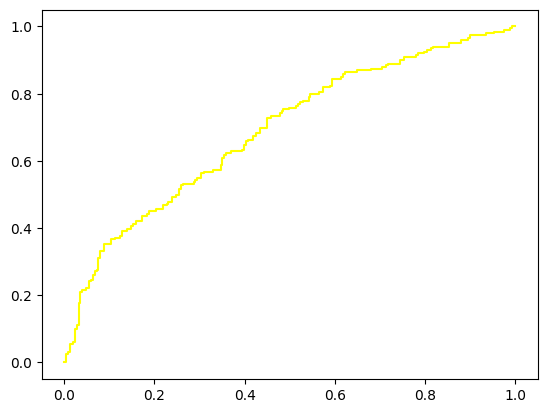

In [103]:
#Vejo a curva ROC do modelo INDIVIDUAL e confirmo o valor da AUC
from sklearn.metrics import (roc_curve,auc)

y_pred_prob1 = all_regions_plus_70pct_one_model.predict_proba(X_test_single_transformed)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_single, y_pred_prob1)

auc_ind = auc(fpr1, tpr1)
print(auc_ind)
plt.plot(fpr1, tpr1, label= "Single Model - best model - AUC " +  str(auc_ind), color="yellow")

In [104]:
y_pred_prob1.shape

(450,)

In [105]:
y_pred = all_regions_plus_70pct_one_model.predict(X_test_single_transformed)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

,,
,,
Ground Truth Prevalence,. . .,0.442
Test set Prevalence,. . .,0.318
True positive rate (recall),. . .,0.457
False positive rate,. . .,0.207
Positive predictive value (precision),. . .,0.636
True negative rate (specificity),. . .,0.793
False negative rate,. . .,0.543
Negative predictive value,. . .,0.648
Positive likelihood ratio (bigger is better),. . .,2.207


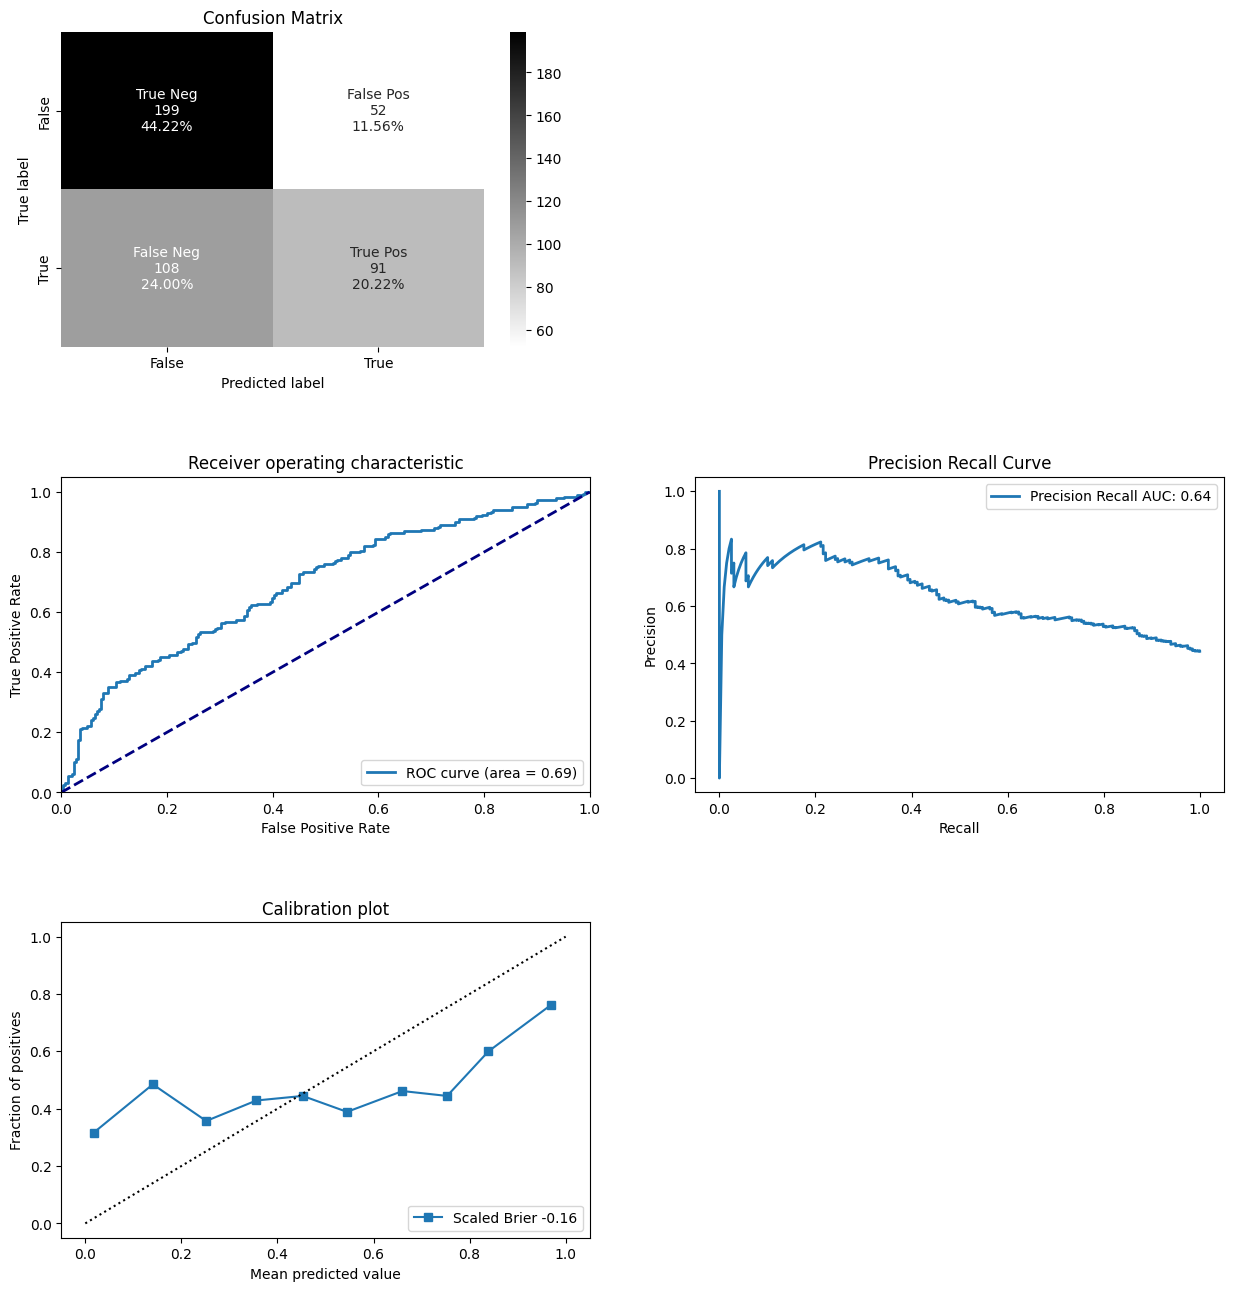

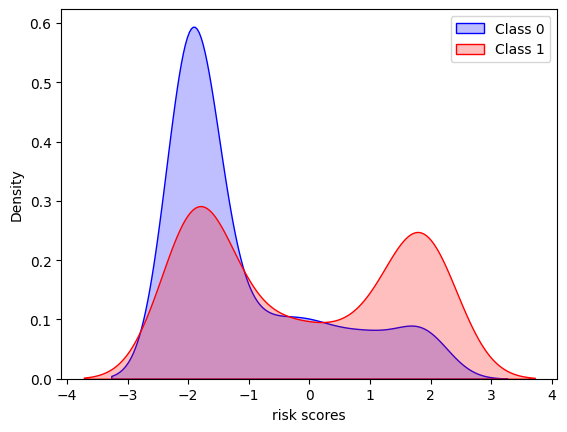

,,
,,
Ground Truth Prevalence,. . .,0.442
Test set Prevalence,. . .,0.318
True positive rate (recall),. . .,0.457
False positive rate,. . .,0.207
Positive predictive value (precision),. . .,0.636
True negative rate (specificity),. . .,0.793
False negative rate,. . .,0.543
Negative predictive value,. . .,0.648
Positive likelihood ratio (bigger is better),. . .,2.207


In [106]:
import MLFlow_Utils
binary_classification_metrics(y_test_single, y_pred, pd.Series(y_pred_prob1))

In [107]:
fprate, tprate, thresholds = roc_curve(y_test_single, y_pred_prob1, pos_label=1)
auc(fprate, tprate)

0.6900438447216161

In [108]:
#ROC_AUC
["{0:0.2f}".format(i) for i in AUC_CI(y_test_single, y_pred_prob1)]

['0.64', '0.74']

In [109]:
#recall
tpr(y_test_single, y_pred)

0.457286432160804

In [110]:
#specificidade
tnr(y_test_single, pd.Series(y_pred))

0.7928286852589641

In [111]:
#accuracy
accuracy(y_test_single, y_pred)

0.6444444444444445

In [112]:
ppv(y_test_single, y_pred)

0.6363636363636364

In [113]:
npv(y_test_single, y_pred)

0.6482084690553745

# End of File